In [5]:
from DSL import * 
from IndividualConstraints import *
from PairwaiseConstraints import * 
from ortools.sat.python import cp_model


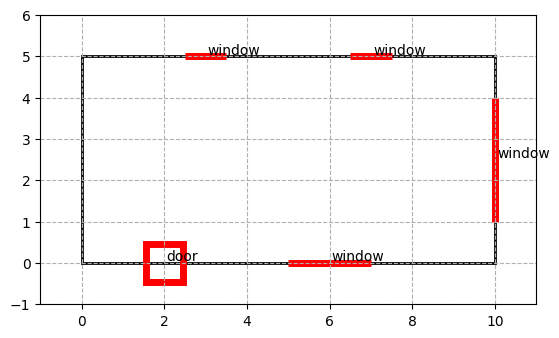

In [6]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

big_window = Object('window', 0, 3, (10, 2.5, 0))
room = Room(10, 5)
room.fixed_objects = [Object('window', 2, 0, (6, 0, 0)), big_window, Object('door', 0.9, 0.9, (2, 0, 0))]
room.fixed_objects += [Object('window', 1, 0, (3, 5, 0)), Object('window', 1, 0, (7, 5, 0))]              
room.draw()

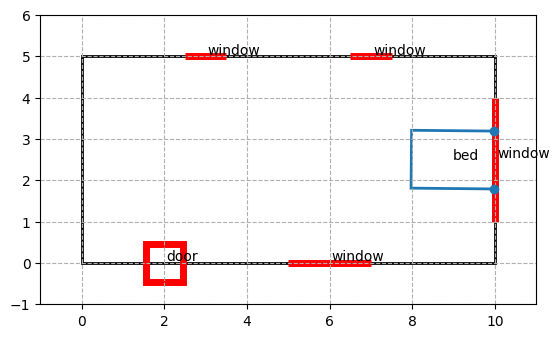

In [7]:
from scipy.optimize import minimize

bed = Object('bed', 1.4, 2)

# Define the objective function
def objective(x):
    obj = Object('bed', 1.4, 2, (x[0], x[1], x[2]))
    return side_next_to_wall(room, obj, 'top', 'E')

# Initial guess
x0 = (room.center[0], room.center[1], 2)
bounds = [(bed.width/2, room.width - bed.width/2), (bed.length/2, room.length - bed.length/2), (-2*np.pi, 2*np.pi)]

# Solve the problem
solution = minimize(objective, x0, method='SLSQP', bounds=bounds)

# Print the result
bed = Object('bed', 1.4, 2, (solution.x[0], solution.x[1], solution.x[2]))
room.moving_objects = [bed]
room.draw() 

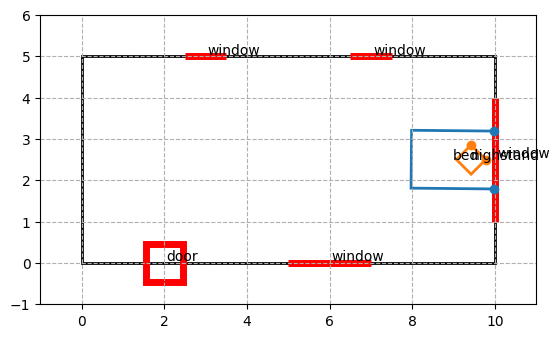

In [8]:
nightstand1 = Object('nighstand', 0.5, 0.5)

# Define the objective function
def objective(x):
    obj = Object('nightstand', 0.5, 0.5, (x[0], x[1], x[2]))
    return next_to_side(obj, bed, 'top') + next_to_wall(room, obj)

# Initial guess
x0 = (room.center[0], room.center[1], 2)
bounds = [(nightstand1.width/2, room.width - nightstand1.width/2), (nightstand1.length/2, room.length - nightstand1.length/2), (-2*np.pi, 2*np.pi)]

# Solve the problem
solution = minimize(objective, x0, method='SLSQP', bounds=bounds)

# Print the result
obj = Object('nighstand', 0.5, 0.5, (solution.x[0], solution.x[1], solution.x[2]))
room.moving_objects += [obj]
room.draw() 